Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END .max_depth=10, min_samples_split=5, n_e

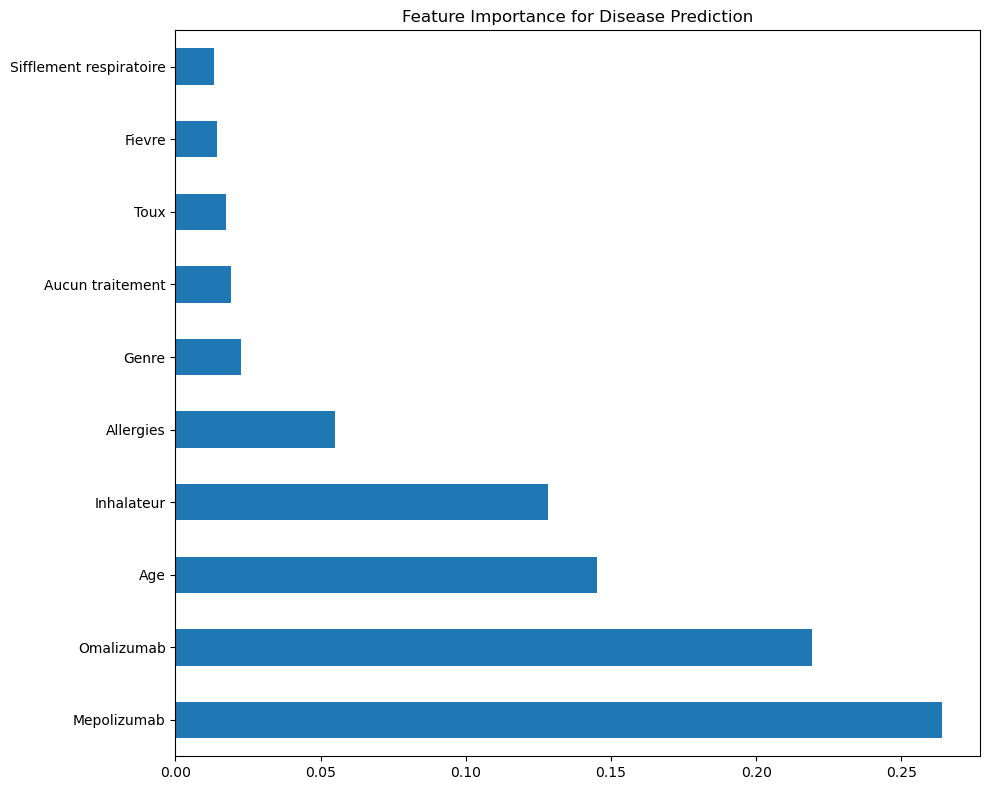

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=5, min_samples_split=5, n_e

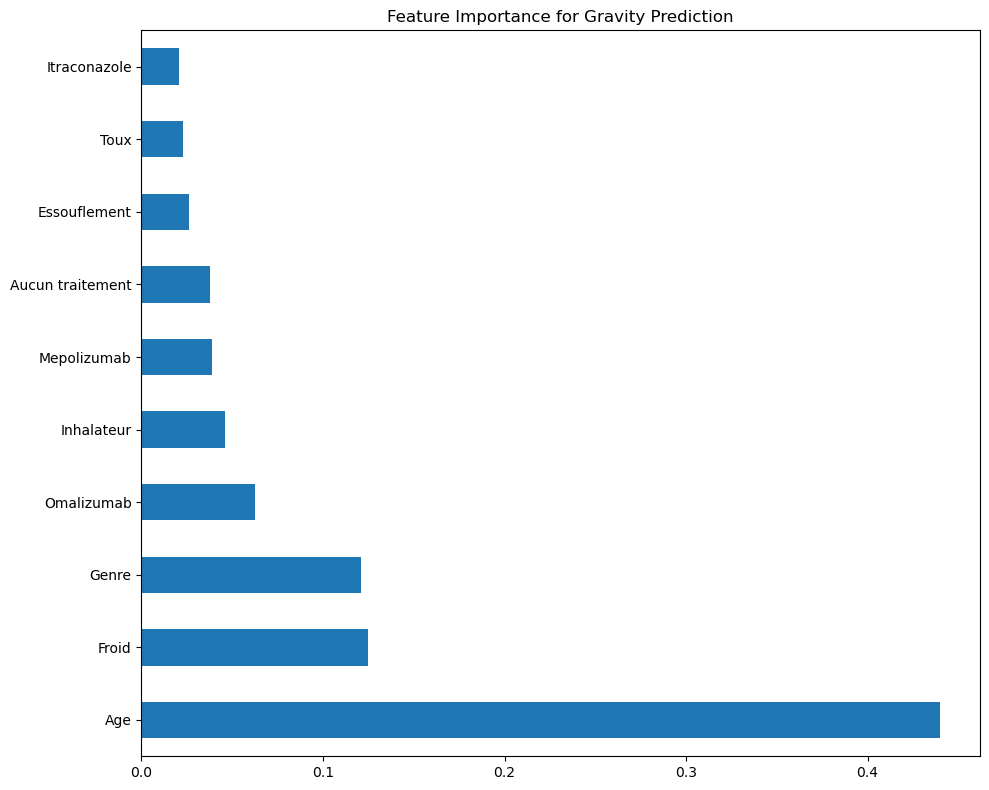

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Load the data
fichier = pd.read_csv("C:\\Users\\PC\\Desktop\\projet\\Web\\traitement_grav_final.csv")

# Prepare the data
X = fichier.drop(['Gravité', 'Disease'], axis=1)
y_disease = fichier['Disease']
y_gravity = fichier['Gravité']

# Split the dataset
X_train, X_test, y_train_disease, y_test_disease, y_train_gravity, y_test_gravity = train_test_split(
    X, y_disease, y_gravity, test_size=0.2, random_state=1)

# Parameters for GridSearchCV
param_grid_disease = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomForest model for disease with GridSearchCV
grid_search_disease = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                                   param_grid=param_grid_disease, cv=3, verbose=2, n_jobs=1)
grid_search_disease.fit(X_train, y_train_disease)

# Best model for disease
best_clf_disease = grid_search_disease.best_estimator_

# Prediction with the best model for disease
y_pred_disease = best_clf_disease.predict(X_test)
print("Confusion Matrix for Disease Prediction:")
print(confusion_matrix(y_test_disease, y_pred_disease))
print("\nClassification Report for Disease Prediction:")
print(classification_report(y_test_disease, y_pred_disease))

# Feature importances for disease prediction
feature_importances_disease = pd.Series(best_clf_disease.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 8))
feature_importances_disease.nlargest(10).plot(kind='barh')
plt.title('Feature Importance for Disease Prediction')
plt.tight_layout()  # Adjust the plot to include all elements properly
plt.savefig("C:\\Users\\PC\\Desktop\\projet\\Web\\feature_importances_disease.png")  # Saving the plot
plt.show()

# Preparing data for the gravity model
X_train_gravity = X_train[y_train_disease == 1]
y_train_gravity_filtered = y_train_gravity[y_train_disease == 1]

# Parameters for GridSearchCV for gravity model
param_grid_gravity = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomForest model for gravity with GridSearchCV
grid_search_gravity = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                                   param_grid=param_grid_gravity, cv=3, verbose=2, n_jobs=1)
grid_search_gravity.fit(X_train_gravity, y_train_gravity_filtered)

# Best model for gravity
best_clf_gravity = grid_search_gravity.best_estimator_

# Prediction with the best model for gravity
X_test_gravity = X_test[y_pred_disease == 1]
y_pred_gravity = best_clf_gravity.predict(X_test_gravity)
actual_gravity = y_test_gravity[y_pred_disease == 1]

print("Confusion Matrix for Asthma Severity Prediction among Predicted Cases:")
print(confusion_matrix(actual_gravity, y_pred_gravity))
print("\nClassification Report for Asthma Severity Prediction among Predicted Cases:")
print(classification_report(actual_gravity, y_pred_gravity))

# Feature importances for gravity prediction
feature_importances_gravity = pd.Series(best_clf_gravity.feature_importances_, index=X_train_gravity.columns)
plt.figure(figsize=(10, 8))
feature_importances_gravity.nlargest(10).plot(kind='barh')
plt.title('Feature Importance for Gravity Prediction')
plt.tight_layout()  # Adjust the plot to include all elements properly
plt.savefig("C:\\Users\\PC\\Desktop\\projet\\Web\\feature_importances_gravity.png")  # Saving the plot
plt.show()

# Optionally save the best models
# joblib.dump(best_clf_disease, 'C:\\Users\\PC\\Desktop\\projet\\Web\\best_clf_disease.joblib')
# joblib.dump(best_clf_gravity, 'C:\\Users\\PC\\Desktop\\projet\\Web\\best_clf_gravity.joblib')
